In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/diabetes_for_test.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1.  데이터 탐색
## (1) 시각화 포함 탐색적 자료분석을 시행하시오

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

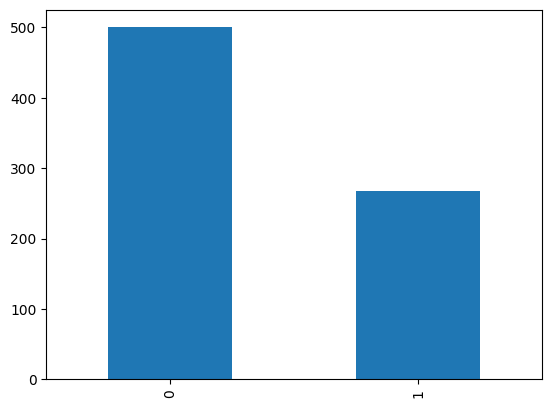

In [5]:
df['Outcome'].value_counts().plot(kind='bar')

- 종속변수인 Outcome은 범주형 변수이고, 클래스 별 분포도 차이가 있으므로, 추후 모델링 시 주의해야한다. 층화 추출법을 이용해 골고루 샘플을 추출해야한다.

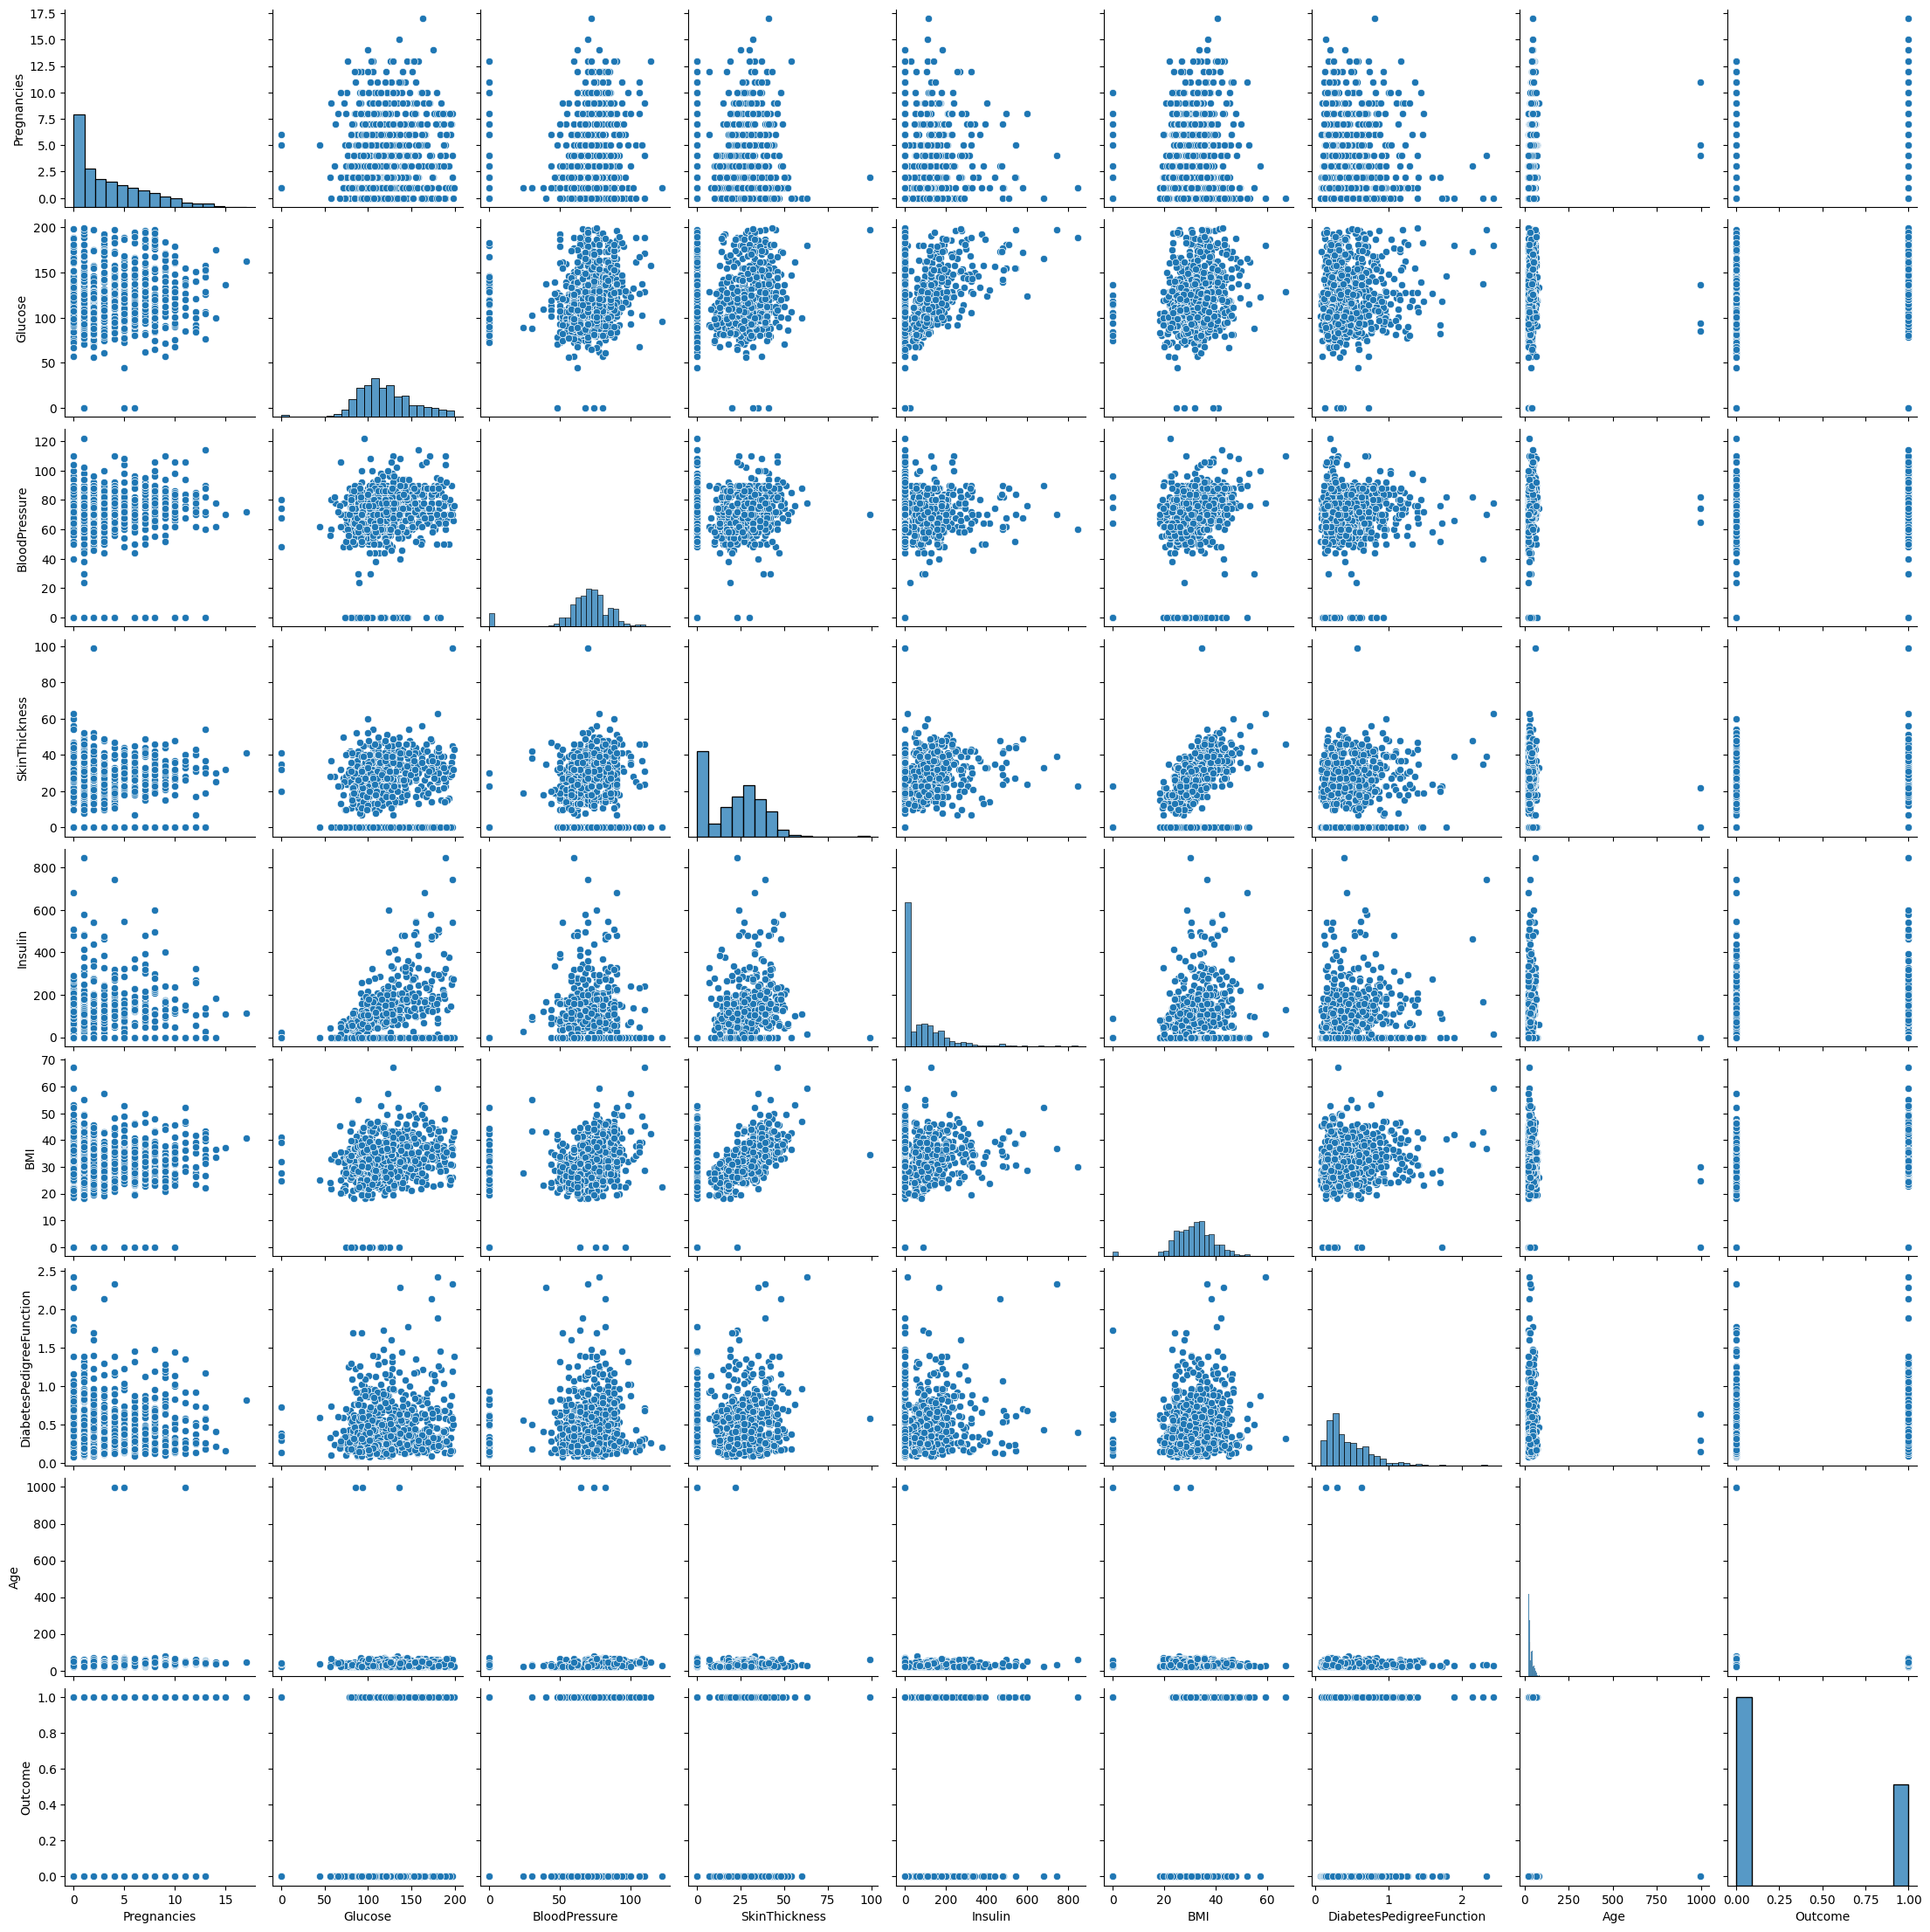

In [6]:
sns.pairplot(df)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


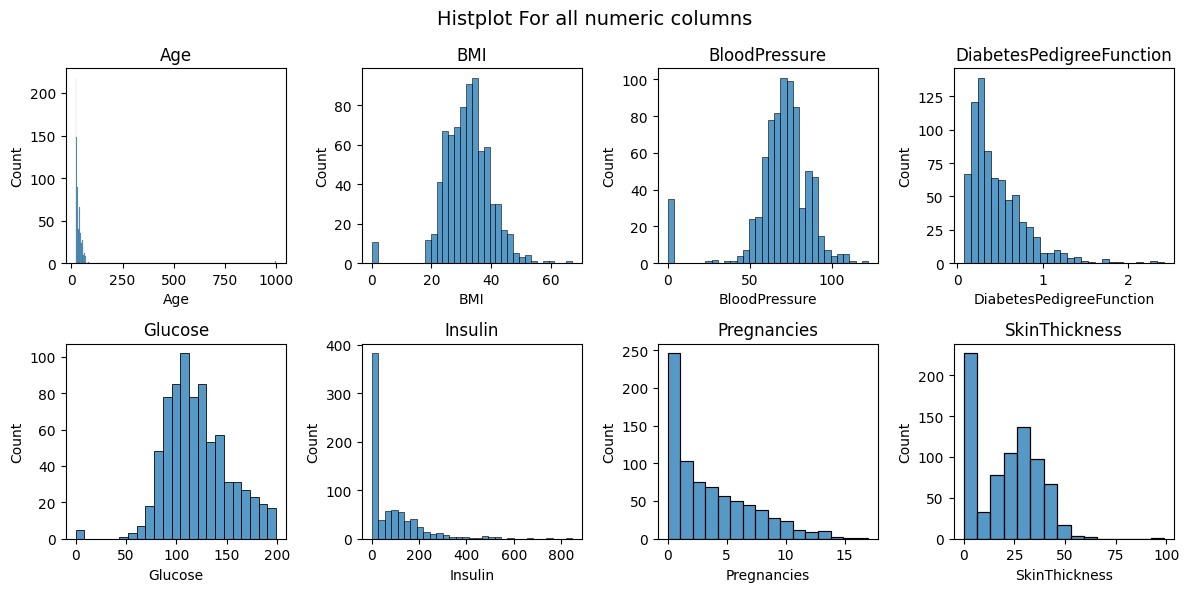

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for idx, col_name in enumerate(df.columns.difference(['Outcome'])):
    ax = axes[idx//4][idx%4]
    sns.histplot(df[col_name], ax=ax)
    ax.set_title(col_name)

fig.suptitle('Histplot For all numeric columns', fontsize=14)
fig.tight_layout()
plt.show()

# BMI, BloodPressure, Age에는 잘못 기입된 것 같은 값이 많음, 예를 들어  BMI나 BloodPressure가 0 

## 이상치 식별
- boxplot을 이용해 시각화 할 수 있고
- IQR 방식으로 해당 이상치의 인덱스만 찾을 수 있음

<AxesSubplot:>

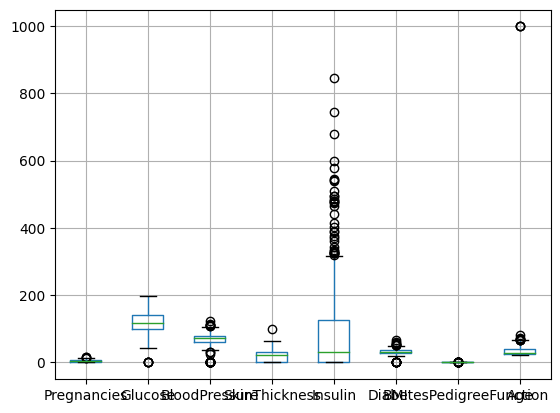

In [9]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].boxplot()

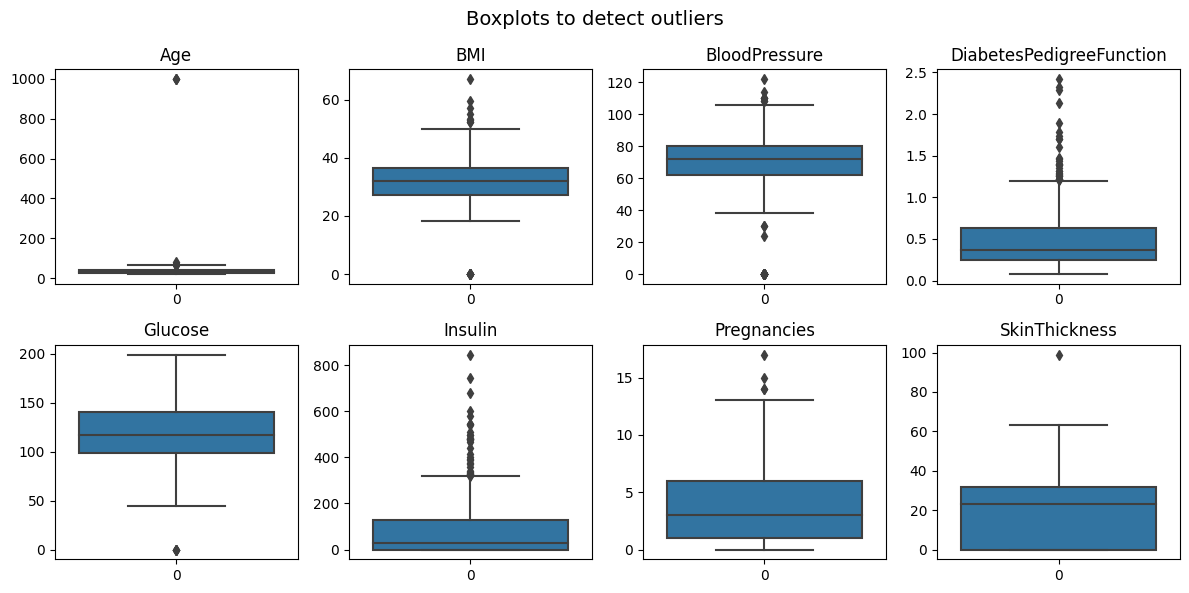

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for idx, col_name in enumerate(df.columns.difference(['Outcome'])):
    ax = axes[idx//4][idx%4]
    sns.boxplot(df[col_name], ax=ax)
    ax.set_title(col_name)

                      
fig.suptitle('Boxplots to detect outliers', fontsize=14)
fig.tight_layout()
plt.show()

In [11]:
## IQR을 이용한 이상치 처리

def detect_outliers(df, col):
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3-Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    
    return df[(df[col] <= min_val) | (df[col] >= max_val)].index

In [12]:
for col in df.columns.difference(['Outcome']):
    outliers_indices = detect_outliers(df, col)
    print('\n', '='*50)
    print(col)
    print('이상치 개수 :', len(outliers_indices))
    print(df.iloc[outliers_indices][col])


Age
이상치 개수 : 11
123     69
363     67
453     72
459     81
489     67
537     67
559    999
629    999
666     70
674     68
684    999
Name: Age, dtype: int64

BMI
이상치 개수 : 19
9       0.0
49      0.0
60      0.0
81      0.0
120    53.2
125    55.0
145     0.0
177    67.1
193    52.3
247    52.3
303    52.9
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64

BloodPressure
이상치 개수 : 45
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64

DiabetesPe

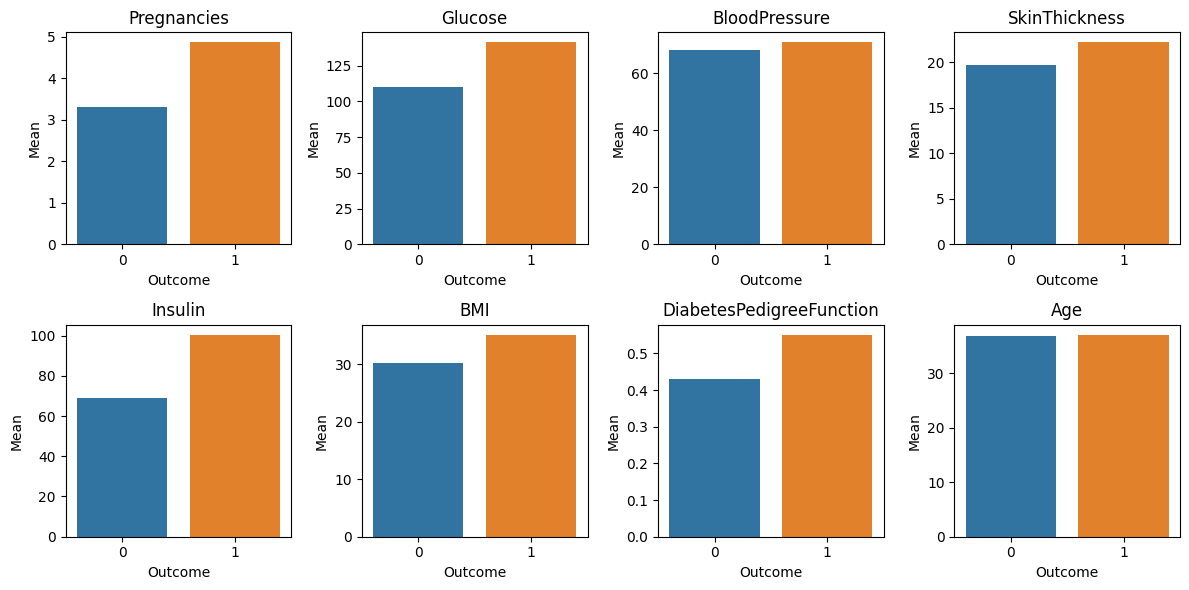

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

diabetes = df.groupby('Outcome').mean()

for idx, col in enumerate(diabetes.columns):
    ax=axes[idx//4][idx%4]
    sns.barplot(x=diabetes.index, y=col, data=diabetes, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Mean')

fig.tight_layout()
plt.show()

<AxesSubplot:>

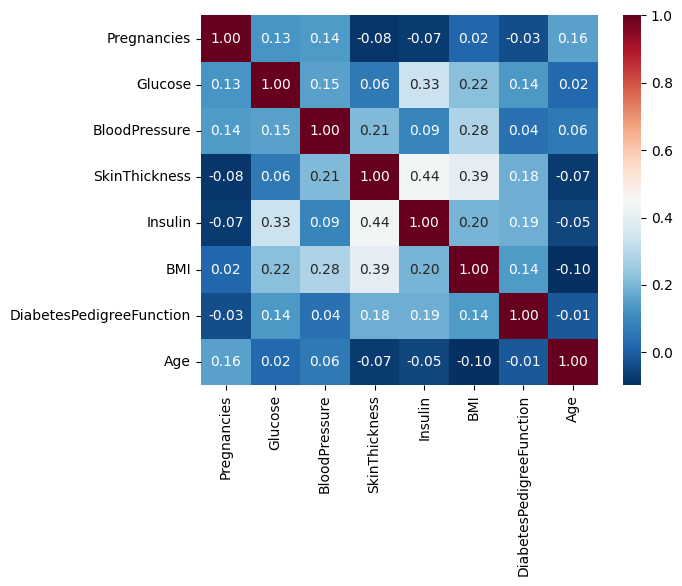

In [14]:
cor_df = df.drop('Outcome', axis=1).corr()
sns.heatmap(cor_df, annot=True, fmt='.2f', cmap='RdBu_r')

In [15]:
outliers_index = df[df['Glucose']==0].index
df.loc[outliers_index, 'Glucose'] = df['Glucose'].median()

outliers_index = df[df['BMI']==0].index
df.loc[outliers_index, 'BMI'] = df['BMI'].median()

outliers_index = df[df['BloodPressure']==0].index
df.loc[outliers_index, 'BloodPressure'] = df['BloodPressure'].median()

outliers_index = df[df['Age']>200].index
df.loc[outliers_index, 'Age'] = df['Age'].median()

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


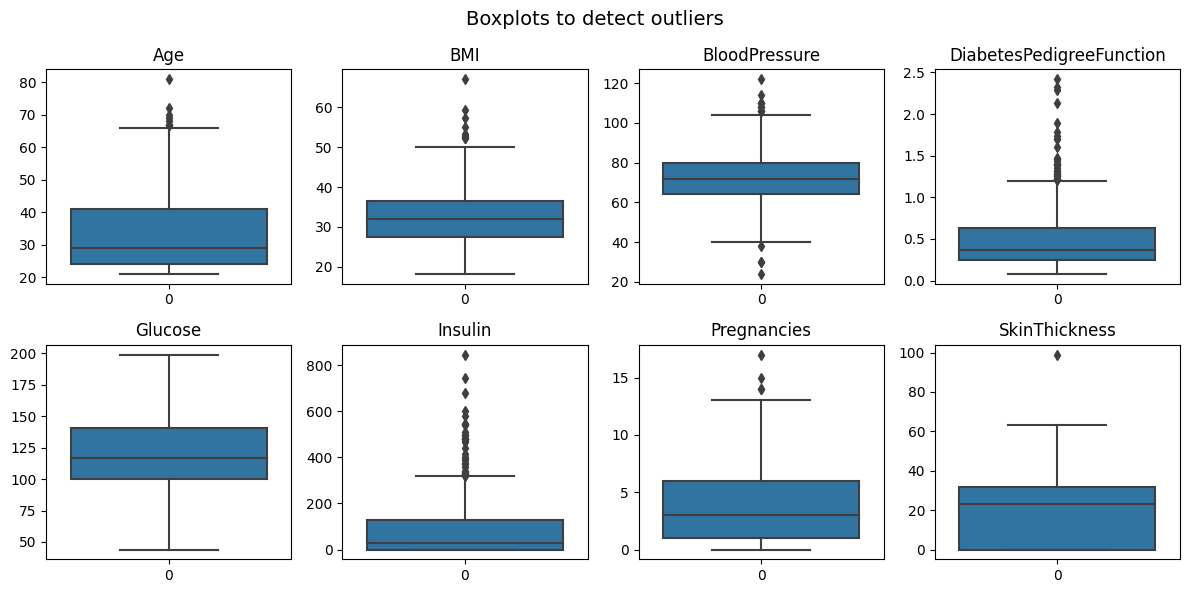

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for idx, col_name in enumerate(df.columns.difference(['Outcome'])):
    ax = axes[idx//4][idx%4]
    sns.boxplot(df[col_name], ax=ax)
    ax.set_title(col_name)

                      
fig.suptitle('Boxplots to detect outliers', fontsize=14)
fig.tight_layout()
plt.show()

In [18]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 오버샘플링

In [38]:
from imblearn.over_sampling import SMOTE

x = df.drop('Outcome', axis=1)
y = df['Outcome']

smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x, y)

In [39]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
x_un, y_un = sampler.fit_resample(x, y)

In [40]:
from collections import Counter

In [41]:
Counter(y_un)

Counter({0: 268, 1: 268})

모델링

In [42]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

LR = LogisticRegression()
xgb = XGBClassifier(random_state=0)
svc = SVC()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
kfold = KFold()
def model_result(model):
    pred_list=[]
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
        
        x_train_resample, y_train_resample = smote_fit